In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from colors import *

In [ ]:
img1 = np.load('conv.npy')
img2 = np.load('eca.npy')

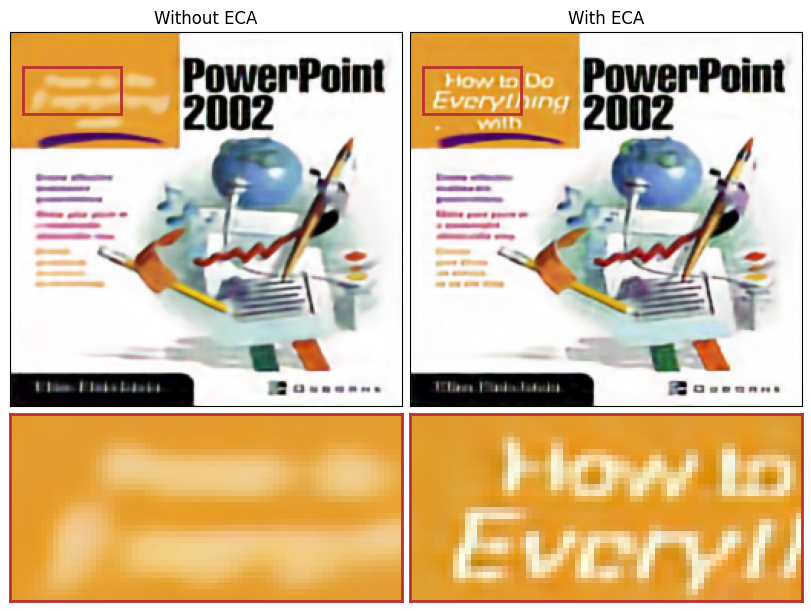

In [9]:
mosaic = [
    ['a', 'b'], 
    ['a', 'b'], 
    ['a1', 'b1']
]

fig, ax = plt.subplot_mosaic(
    mosaic,
    layout='constrained', 
    figsize=(8, 6)
)

# Display original images
ax["a"].imshow(img1, aspect='auto')
ax["a"].set_title("Without ECA")
ax["b"].imshow(img2, aspect='auto')
ax["b"].set_title("With ECA")

x, y, pw, ph = (8, 24, 64, 32)
lw = 2

# Draw rectangles on the original images to indicate zoomed-in patches
for i, img in enumerate([img1, img2]):
    rect = patches.Rectangle((x, y), pw, ph, linewidth=lw, edgecolor=RED, facecolor='none')
    ax["a" if i == 0 else "b"].add_patch(rect)

# Extract and resize zoomed-in patches
patch1 = img1[y:y + ph, x:x + pw]
patch2 = img2[y:y + ph, x:x + pw]

# Display patches
ax["a1"].imshow(patch1, aspect='auto')
ax["b1"].imshow(patch2, aspect='auto')

for a in ['a1', 'b1']:
    for b in ['bottom', 'top', 'right', 'left']:
        ax[a].spines[b].set_color(RED)
        ax[a].spines[b].set_linewidth(lw)

# Remove axis ticks
for a in ax.values():
    a.set_xticks([])
    a.set_yticks([])

plt.savefig('fig_5.1.png', bbox_inches='tight', pad_inches=0.01, dpi=200)
plt.show()